Farhi et al. introduced the quantum approximation optimization algorithm (QAOA) to solve optimization problems like the max cut problem. Before diving into the details of QAOA, we’ll first define the max cut problem.

Max Cut is the problem of finding a partition of a graph’s nodes into two sets which maximizes the edges between the two sets. Although this problem is relatively easy to solve for graphs with few vertices, this problem is NP-hard. The max cut problem has a wide range of applications including machine learning, circuit design and statistical physics, among others. Furthermore, the QAOA algorithm presented in this tutorial can be adapted to other related optimization problems with an even wider application field including portfolio optimization and job shop scheduling, just to name a few.

We take the convention that 
 represents a graph with vertex set 
 and edge set 
. We use the terms vertex and node interchangeably. For this tutorial we assume that the graphs are undirected (that is, 
 and 
 represent the same edge). Our graphs contain no self loops (i.e., for every vertex 
, there is no edge 
). A cut of the graph 
 is a partition, 
, of the vertex set such that every vertex of 
 is a member of exactly one of 
 or 
 (i.e., 
 and 
). The cut value for a partition is the sum of the edges with one node in 
 and one node in 
.

In the images below, we illustrate two cuts of a graph with the dotted lines. Each of these cuts partitions the graph into two disjoint sets. The cut on the left is not optimal, and the cut on the right is the max cut. The cut on the left divides the graph into disjoint sets 
 and 
, and that cut contains 3 edges. To more easily visualize the cut, we have colored the vertices in one set of the partition green and the vertices in the other set of the partition gray. The cut depicted in the diagram on the right divides the graph vertices into two disjoint sets 
, colored gray, and 
, colored green. The number of edges connecting vertices in the distinct sets is computed by

 
 
 
For the graph on the right, the number of edges in the cut (in this case there are 
 edges) is maximal, and this value is referred to as the max cut value. The partitioning 
 — and sometimes the set of edges connecting vertices in 
 and 
 — is referred to as a max cut of a graph. Note that the max cut of a graph need not be unique; that is, two distinct partitions may produce the same cut value.

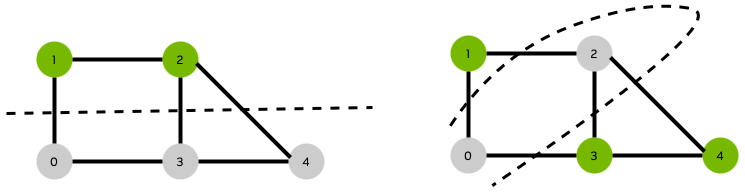

We will use bitstrings to identify vertices in each of the two partitions. For example using the ordering of the vertices, the bitstring 01100 captures the partition in the image above on the left with vertices 
 and 
 in 
, and the bitstring 01011 codes the partition in the image on the right with vertices 
, 
, and 
 in 
.

Let’s code our graph data as lists of integers so that we can call these variables when we create the cudaq.kernel for QAOA.

In [1]:
import numpy as np
import cudaq
from cudaq import spin
from typing import List

# We'll use the graph below to illustrate how QAOA can be used to
# solve a max cut problem

#       v1  0--------------0 v2
#           |              | \
#           |              |  \
#           |              |   \
#           |              |    \
#       v0  0--------------0 v3-- 0 v4
# The max cut solutions are 01011, 10100, 01010, 10101 .

# First we define the graph nodes (i.e., vertices) and edges as lists of integers so that they can be broadcast into
# a cudaq.kernel.
nodes: List[int] = [0, 1, 2, 3, 4]
edges = [[0, 1], [1, 2], [2, 3], [3, 0], [2, 4], [3, 4]]
edges_src: List[int] = [edges[i][0] for i in range(len(edges))]
edges_tgt: List[int] = [edges[i][1] for i in range(len(edges))]

QAOA is a variational algortihm with a particular ansatz. QAOA is made up of a variational quantum circuit (i.e., a kernel that depends on a set of parameter values) and a classical optimizer. The aim of QAOA is to use the classical optimizer to identify parameter values that generate a quantum circuit whose expectation value for a given cost Hamilitonian is minimized.

What distinguishes QAOA from other variational algorithms is the structure of the quantum circuit. For each vertex in the graph, there is an associated qubit in the circuit. The circuit is initialized in a superposition state. The remainder of the QAOA circuit is made up of blocks (referred to as layers). The more layers there are, the better the approximation the algorithm achieves.

SyntaxError: invalid syntax (339224343.py, line 1)